# Large movie review dataset preprocessor
This notebook will prepare the Large movie review dataset for the Peltarion platform.

Raw datasat: http://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

## Setup

### Paths

In [14]:
# Raw dataset
input_path = './aclImdb/train'
# Zip output
output_path = './data.csv'

### Get list of text file paths

In [4]:
txt_paths_pos = glob(input_path + '/pos/*.txt') 
txt_paths_neg = glob(input_path + '/neg/*.txt')
print("Files found (positive reviews): ", len(txt_paths_pos))
print("Files found (negative reviews): ", len(txt_paths_neg))

Files found (positive reviews):  12500
Files found (negative reviews):  12500


### Helper functions

In [1]:
def get_text_from_file(path):
    with open(path, 'r') as file:
        return file.read()

### Progress bar for Pandas

In [6]:
tqdm.pandas()

## Create Dataframe
The class column values are derived from the names of the subfolders in the `input_path`.

The image column contains the relative path to the images in the subfolders.

In [7]:
# Create dataframe containing positive reviews
df_pos = pd.DataFrame({'review': txt_paths_pos})
df_pos.insert(loc=1, column='sentiment', value= 'positive')
# Create dataframe containing negative reviews
df_neg = pd.DataFrame({'review': txt_paths_neg})
df_neg.insert(loc=1, column='sentiment', value= 'negative')
# Concatenate dataframes containing positive and negative reviews
df = pd.concat([df_pos, df_neg])
# Replace path with review text
df['review'] = df['review'].apply(lambda path: get_text_from_file(path))
# Shuffle the rows to ensure that both examples of both clases are displayed in the Dataset previw on the Platform.
df = df.sample(frac=1.0, random_state=1)
df.head()

,review,sentiment
8992,"Hubert Selby Jr. gave us the book ""Requiem For...",negative
9488,There are very few performers today who can ke...,positive
4433,C'mon guys some previous reviewers have nearly...,negative
104,The movie has several story lines that follow ...,negative
8222,"don't mind the soundtrack, which is played out...",positive


## Create CSV output

In [8]:
#df.to_csv('data.csv', index = None, header=True)
df.to_csv(output_path, index = None, header=True)

## Calculate optimum shape of review column in Platform

Add a column that contains the number of words in each review.


In [9]:
df_stat = df.copy()
df_stat['word_count'] = df['review'].apply(lambda txt: len(txt.split(' ')))
df_stat.head()

,review,sentiment,word_count
8992,"Hubert Selby Jr. gave us the book ""Requiem For...",negative,287
9488,There are very few performers today who can ke...,positive,348
4433,C'mon guys some previous reviewers have nearly...,negative,253
104,The movie has several story lines that follow ...,negative,290
8222,"don't mind the soundtrack, which is played out...",positive,150


The platform will truncate review texts that have a word count that exceeds the vector length (shape).
A long vector will typically give a better performance but the model will take longer to train.

Minimum word count required to include all words in 0.95 of the reviews: 598.0


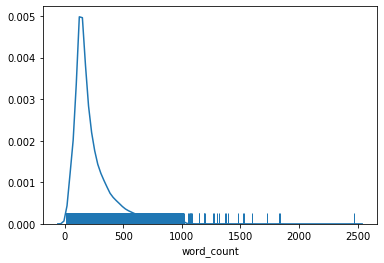

In [17]:
q=0.95
x = df_stat['word_count']
sns.distplot(x, hist=False, rug=True);
print('Minimum word count required to include all words in {} of the reviews: {}'.format(q, x.quantile(q)))  
